In [1]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("bmh")

In [2]:
costs = pd.read_csv(r"D:\IIT BOMBAY\February 2025\Statewise Data\Maharashtra\costs.csv")

In [3]:
costs.head()

,technology,parameter,value,unit,source,further description,currency_year
0,Pumped-Storage-Hydro,FOM,2.0,%/year,"Viswanathan_2022, 0.43 % of SB","{'carrier': ['phs'], 'technology_type': ['stor...",2020.0
1,Pumped-Storage-Hydro,investment,810000.0,USD/MW,"Viswanathan_2022, p.68 (p.90)","{'carrier': ['phs'], 'technology_type': ['stor...",2020.0
2,Pumped-Storage-Hydro,lifetime,50.0,years,"Viswanathan_2022, p.68 (p.90)","{'carrier': ['phs'], 'technology_type': ['stor...",2020.0
3,Pumped-Storage-Hydro,VOM,0.0,USD/MWh,NaN,NaN,NaN
4,Pumped-Storage-Hydro,fuel,0.0,USD/MWh,NaN,NaN,NaN


In [4]:
defaults = {
    "FOM": 0,
    "VOM": 0,
    "efficiency": 1,
    "fuel": 0,
    "investment": 0,
    "lifetime": 25,
    "CO2 intensity": 0,
    "discount rate": 0.07,
}

In [5]:
path= r"D:\IIT BOMBAY\February 2025\Statewise Data\Maharashtra\timeseries_2023.xlsx"

In [6]:
# path= r"D:\IIT BOMBAY\March 2025\timeseries_2023.xlsx"

In [7]:
ts=pd.read_excel(path, index_col=0, parse_dates=True)

C:\Anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

C:\Anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [8]:
ts.head()

,load,wind,solar,poa,temperature,windspeed
timestamp,,,,,,
2023-01-01 00:00:00,19025.35,0.340,0.0,0.0,17.00,4.8
2023-01-01 01:00:00,19347.82,0.344,0.0,0.0,16.51,4.8
2023-01-01 02:00:00,19285.98,0.289,0.0,0.0,16.07,4.8
2023-01-01 03:00:00,19319.33,0.114,0.0,0.0,15.67,4.7
2023-01-01 04:00:00,19637.19,0.035,0.0,0.0,15.29,4.6


In [9]:
resolution = 1
ts = ts.resample(f"{resolution}h").first()

In [10]:
n=pypsa.Network()

In [11]:
n.add('Bus','electricity')

Index(['electricity'], dtype='object')

In [12]:
n.set_snapshots(ts.index)
n.snapshots

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='h')

In [13]:
n.snapshot_weightings.loc[:, :] = resolution

In [14]:
carriers = [
    "solar",
    "onwind",
    "coal",
    "gas",
    "hydro",
    "nuclear",
    # "BESS",
    # "PHES",
    "Biomass",
]

n.add(
    "Carrier",
    carriers,
    color=["dodgerblue", "aquamarine", "black", "brown", "magenta", "yellowgreen","green"],
)

Index(['solar', 'onwind', 'coal', 'gas', 'hydro', 'nuclear', 'Biomass'], dtype='object')

In [15]:
n.add(
    "Load",
    "demand",
    bus="electricity",
    p_set=ts.load,
)

Index(['demand'], dtype='object')

C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.



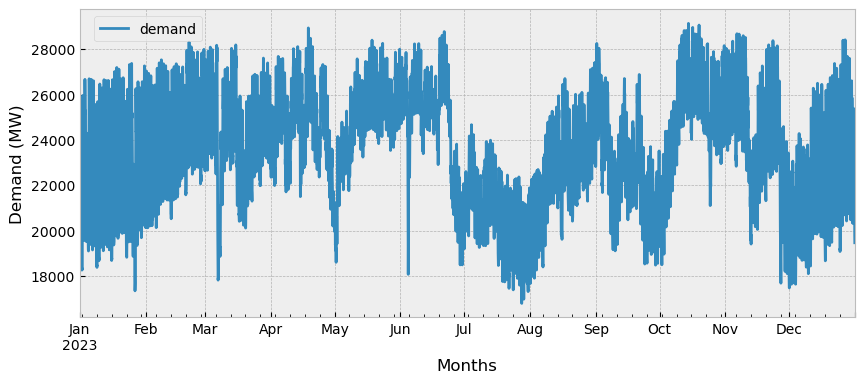

In [16]:
n.loads_t.p_set.plot(figsize=(10, 4), ylabel="Demand (MW)", xlabel="Months",)
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.00))  # Adjust (x, y) for better positioning
plt.savefig("Demand_2023.png")

In [17]:
n.add(
    "Generator",
    "coal",
    bus="electricity",
    carrier="coal",
    capital_cost=136976,
    marginal_cost=0,
    efficiency=35,
    p_nom_extendable= False,
    p_nom_min= 24006.01
)

Index(['coal'], dtype='object')

In [18]:
n.add(
    "Generator",
    "gas",
    bus="electricity",
    carrier="gas",
    capital_cost=85312,
    marginal_cost=0,
    efficiency=44,
    p_nom_extendable= False,
    p_nom_min= 3512.73
)

Index(['gas'], dtype='object')

In [19]:
n.add(
    "Generator",
    "hydro",
    bus="electricity",
    carrier="hydro",
    capital_cost=122320,
    marginal_cost=0,
    efficiency=92,
    p_nom_extendable=True,
    p_nom_min= 3331.84,
)

Index(['hydro'], dtype='object')

In [20]:
n.add(
    "Generator",
    "nuclear",
    bus="electricity",
    carrier="nuclear",
    capital_cost=205120,
    marginal_cost=0,
    efficiency=33,
    p_nom_extendable=True,
    p_nom_min= 879.33,
)

Index(['nuclear'], dtype='object')

In [21]:
n.add(
    "Generator",
    "biomass",
    bus="electricity",
    carrier="biomass",
    capital_cost=85260,
    marginal_cost=700,
    efficiency=24,
    p_nom_extendable=True,
    p_nom_min= 2568,
)

Index(['biomass'], dtype='object')

In [22]:
for tech in ["solar"]:
    n.add(
        "Generator",
        tech,
        bus="electricity",
        carrier=tech,
        p_max_pu=ts[tech],
        capital_cost=46452,
        marginal_cost=0,
        efficiency=100,
        p_nom_extendable=True,
        p_nom_min= 6249.67,
    )

In [23]:
for tech in ["wind"]:
    n.add(
        "Generator",
        tech,
        bus="electricity",
        carrier=tech,
        p_max_pu=ts[tech],
        capital_cost=104748,
        marginal_cost=0,
        efficiency=43,
        p_nom_extendable=True,
        p_nom_min= 5207.98
    )

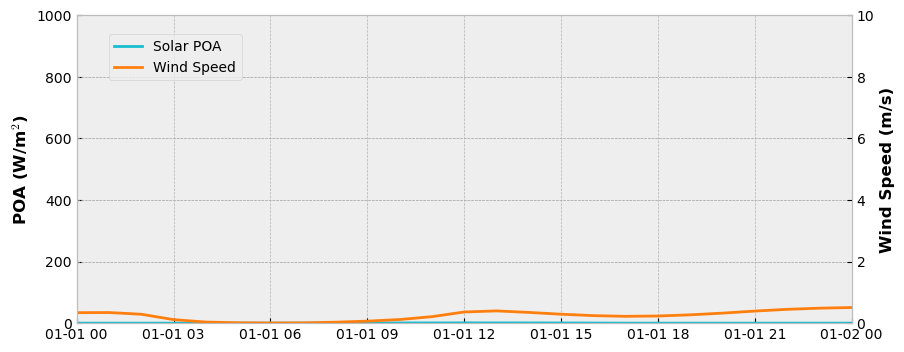

In [24]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-01-02'))
# Plot solar POA on the left y-axis
color='tab:cyan'
ax1.plot(ts.index, ts["solar"], label="Solar POA",color=color)
ax1.set_ylabel("POA (W/m${^2}$)",weight='bold')
ax1.tick_params(axis="y")

# Create a second y-axis (right side)
color='tab:orange'
ax2 = ax1.twinx()
ax2.plot(ts.index, ts["wind"], label="Wind Speed",color=color)
ax2.set_ylabel("Wind Speed (m/s)", weight='bold')
ax2.tick_params(axis="y")

ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 10)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))  # Adjust (x, y) for better positioning

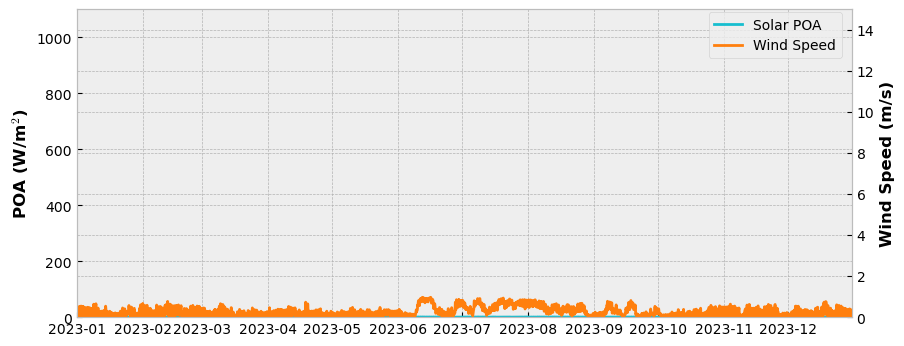

In [25]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31'))
# Plot solar POA on the left y-axis
color='tab:cyan'
ax1.plot(ts.index, ts["solar"], label="Solar POA",color=color)
ax1.set_ylabel("POA (W/m${^2}$)",weight='bold')
ax1.tick_params(axis="y")

# Create a second y-axis (right side)
color='tab:orange'
ax2 = ax1.twinx()
ax2.plot(ts.index, ts["wind"], label="Wind Speed",color=color)
ax2.set_ylabel("Wind Speed (m/s)", weight='bold')
ax2.tick_params(axis="y")

ax1.set_ylim(0, 1100)
ax2.set_ylim(0, 15)
fig.legend(loc='upper left', bbox_to_anchor=(0.75, 0.89))  # Adjust (x, y) for better positioning

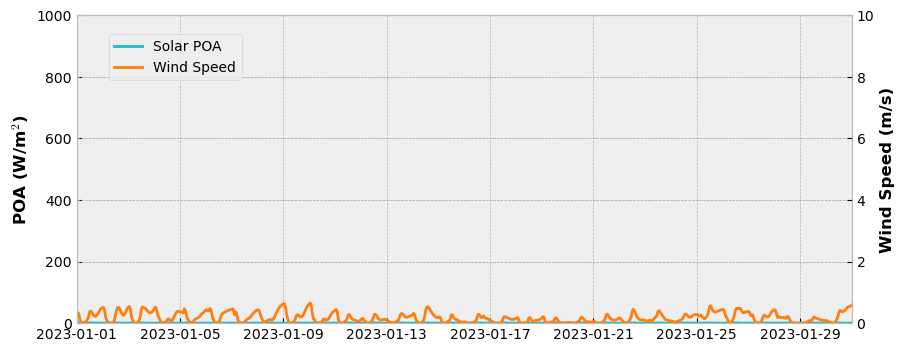

In [26]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-01-31'))
# Plot solar POA on the left y-axis
color='tab:cyan'
ax1.plot(ts.index, ts["solar"], label="Solar POA",color=color)
ax1.set_ylabel("POA (W/m${^2}$)",weight='bold')
ax1.tick_params(axis="y")

# Create a second y-axis (right side)
color='tab:orange'
ax2 = ax1.twinx()
ax2.plot(ts.index, ts["wind"], label="Wind Speed",color=color)
ax2.set_ylabel("Wind Speed (m/s)", weight='bold')
ax2.tick_params(axis="y")

ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 10)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))  # Adjust (x, y) for better positioning

In [27]:
n.optimize(solver_name="highs")

Index(['biomass', 'wind'], dtype='object', name='Generator')
Index(['electricity'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.46it/s]
INFO:linopy.io: Writing time: 1.44s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 61325 primals, 131405 duals
Objective: 4.34e+09
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper were not assigned to the network.


('ok', 'optimal')

In [28]:
n.objective / 1e9 #(Total system cost in USD billions per year)

4.343459213378146

In [29]:
n.generators.p_nom_opt.div(1e3)  # (Total optimised capacity in GW)

Generator
coal        0.000000
gas         0.000000
hydro      24.984963
nuclear     0.879330
biomass     2.568000
solar       6.249670
wind        5.207980
Name: p_nom_opt, dtype: float64

<Axes: ylabel='p_nom_opt'>

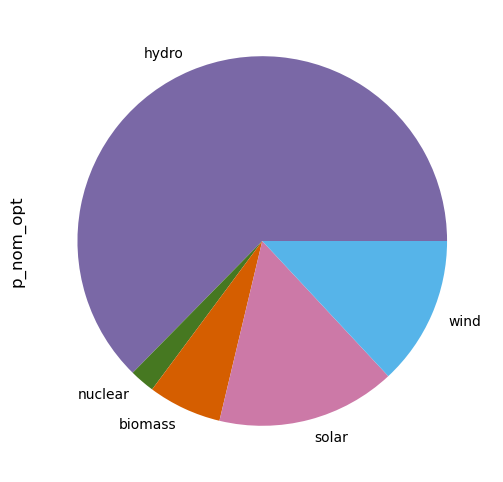

In [30]:
n.generators.p_nom_opt.div(1e3).plot.pie(figsize=(6,6))

In [31]:
n.snapshot_weightings.generators @ n.generators_t.p.div(1e6)  # (Total energy generation in TWh units)

Generator
coal         0.000000
gas          0.000000
hydro      180.533549
nuclear      4.025061
biomass      0.074497
solar       10.945488
wind        10.778539
Name: generators, dtype: float64

In [32]:
(n.statistics.capex() + n.statistics.opex()).div(1e6)

component  carrier
Generator  biomass    271.095263
           hydro             NaN
           nuclear           NaN
           solar             NaN
           wind              NaN
dtype: float64

In [33]:
def plot_dispatch(n, time='2023-01'):
    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)

    if not n.storage_units.empty:
        sto = n.storage_units_t.p.T.groupby(n.storage_units.carrier).sum().T.div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)

    fig, ax = plt.subplots(figsize=(10, 4))

    color = p_by_carrier.columns.map(n.carriers.color)

    p_by_carrier.where(p_by_carrier > 0).loc[time].plot.area(
        ax=ax,
        linewidth=0
        #color=color
    )

    charge = p_by_carrier.where(p_by_carrier < 0).dropna(how="all", axis=1).loc[time]

    if not charge.empty:
        charge.plot.area(
            ax=ax,
            linewidth=0
            #color=charge.columns.map(n.carriers.color),
        )

    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c="k")

    plt.legend(loc=(1.05, 0))
    ax.set_ylabel("GW")
    ax.set_ylim(-15, 40)

C:\Users\sumit\AppData\Local\Temp\ipykernel_7832\904005722.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



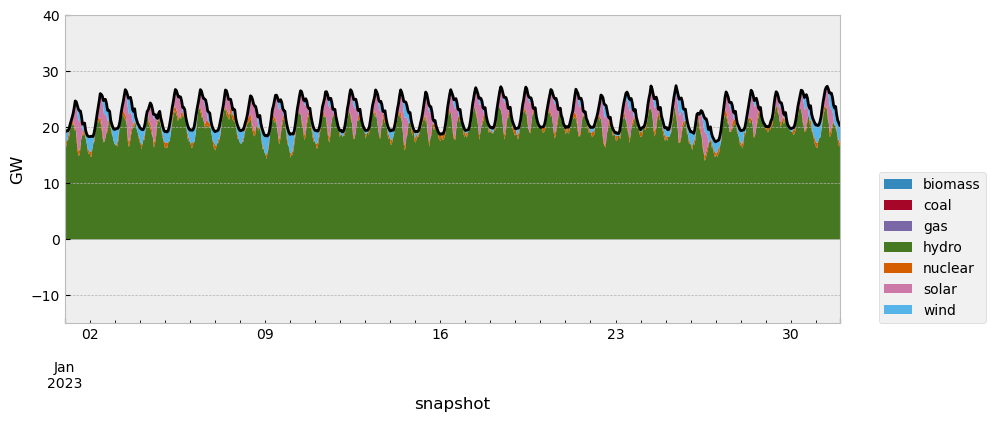

In [34]:
plot_dispatch(n)

In [35]:
n.add(
    "StorageUnit",
    "BESS",
    bus="electricity",
    carrier="battery storage",
    max_hours=4,
    capital_cost=93174,
    p_nom_extendable=True,
    cyclic_state_of_charge=True,
)

Index(['BESS'], dtype='object')

In [36]:
n.add(
    "StorageUnit",
    "PHES",
    bus="electricity",
    carrier="PHES",
    max_hours=6,
    capital_cost=98658,
    p_nom_extendable=True,
    cyclic_state_of_charge=True,
    p_nom_min= 400
)

Index(['PHES'], dtype='object')

In [37]:
n.optimize(solver_name="highs")

Index(['biomass', 'wind'], dtype='object', name='Generator')
Index(['BESS', 'PHES'], dtype='object', name='StorageUnit')
Index(['electricity'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.77it/s]
INFO:linopy.io: Writing time: 2.33s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 113887 primals, 254047 duals
Objective: 4.34e+09
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energ

('ok', 'optimal')

In [38]:
n.generators.p_nom_opt.div(1e3)  # (Total optimised capacity in GW)

Generator
coal        0.000000
gas         0.000000
hydro      24.482305
nuclear     0.879330
biomass     2.568000
solar       6.249670
wind        5.207980
Name: p_nom_opt, dtype: float64

In [39]:
n.snapshot_weightings.generators @ n.generators_t.p.div(1e6)  # (Total energy generation in TWh units)

Generator
coal         0.000000
gas          0.000000
hydro      180.293310
nuclear      4.189531
biomass      0.051665
solar       10.979783
wind        10.842844
Name: generators, dtype: float64

In [40]:
n.storage_units.p_nom_opt.div(1e3) # GW

StorageUnit
BESS   -0.000000
PHES    0.701968
Name: p_nom_opt, dtype: float64

In [41]:
n.storage_units.p_nom_opt.div(1e3) * n.storage_units.max_hours  # GWh

StorageUnit
BESS   -0.000000
PHES    4.211809
dtype: float64

In [42]:
def system_cost(n):
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6)  # million €/a

In [43]:
system_cost(n)

carrier
biomass    255.113038
hydro             NaN
nuclear           NaN
solar             NaN
wind              NaN
PHES              NaN
dtype: float64

C:\Users\sumit\AppData\Local\Temp\ipykernel_7832\904005722.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



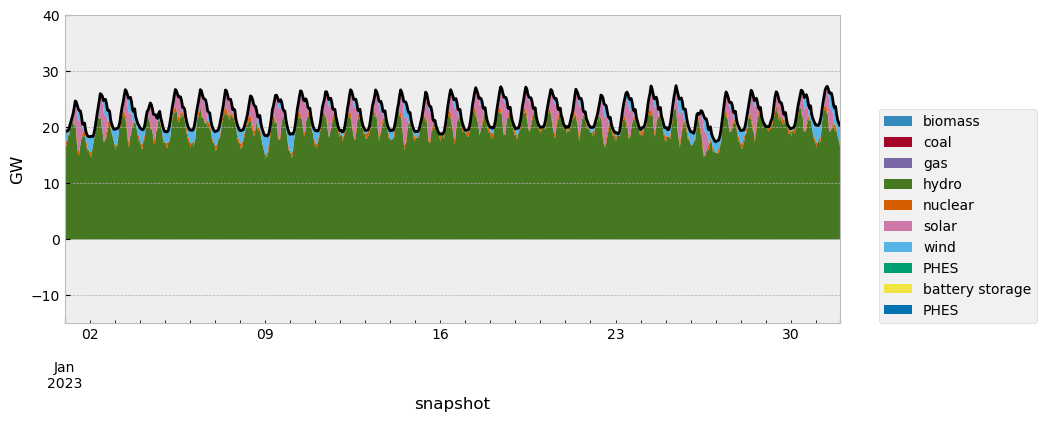

In [44]:
plot_dispatch(n)